# EDA

In [1]:
from graphviz import Source
from IPython.display import display
from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import pickle
%matplotlib inline
sns.set()
sns.set_context('poster')
sns.set_style("darkgrid")

In [2]:
start = datetime.datetime.time(datetime.datetime.now())

## Preliminary EDA On 2010 Data

In [3]:
df_2010 = pd.read_csv('../data/merged/eda_2010.csv')

In [4]:
df_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Columns: 191 entries, year to murder_per_100_k
dtypes: float64(173), int64(17), object(1)
memory usage: 140.3+ KB


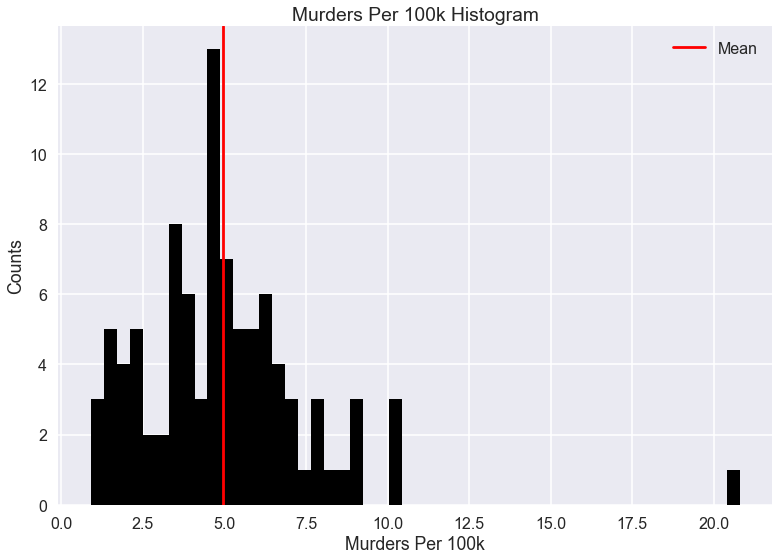

In [5]:
with sns.axes_style("darkgrid"):
    plt.hist(df_2010.murder_per_100_k.values, bins=50, facecolor='black')
    plt.axvline(df_2010.murder_per_100_k.mean(), 0, 1, color='r', label='Mean')
    plt.xlabel("Murders Per 100k")
    plt.ylabel("Counts")
    plt.title("Murders Per 100k Histogram")
    plt.legend()

In [6]:
# drop column 145 because it contains blanks
df_2010 = df_2010.drop(
    ['poverty_married-couple_family_with_related_children_under_5_years_only'], axis=1)

In [7]:
relevant_cols = ['family_households_married-couple_family',
                 'family_household_married_couple_family_with_own_children_under_18_years',
                 'family_households_female_householder_no_husband_present',
                 'family_households_female_householder_no_husband_present_with_own_children_under_18',
                 'now_married_except_separated',
                 'less_than_high_school_diploma',
                 'high_school_graduate_or_higher',
                 'unmarried_portion_of_women_15_to_50_years_who_had_a_birth_in_past_12_months',
                 'civilian_noninst_population_18_to_64_years_with_a_disability',
                 'civilian_noninst_population_65_years_and_older_with_a_disability',
                 'industry_transportation_and_warehousing_and_utilities',
                 'median_household_income_(dollars)',
                 'households_with_supplemental_security_income',
                 'households_with_food_stamp_snap_benefits',
                 'median_family_income_(dollars)',
                 'percentage_married-couple_family',
                 'percentage_female_householder_no_husband_present_family',
                 'poverty_all_families',
                 'poverty_all_families_with_related_children_under_18_years',
                 'poverty_all_families_with_related_children_under_18_years_with_related_children_under_5_years_only',
                 'poverty_all_people',
                 'poverty_65_years_and_over',
                 'no_telephone_service_available',
                 'house_median_value_(dollars)',
                 'murder_per_100_k']

In [8]:
selected_cols = ['unmarried_portion_of_women_15_to_50_years_who_had_a_birth_in_past_12_months',
                 'percentage_female_householder_no_husband_present_family',
                 'poverty_all_people',
                 'households_with_food_stamp_snap_benefits',
                 'less_than_high_school_diploma',
                 'now_married_except_separated',
                 'percentage_married-couple_family',
                 'house_median_value_(dollars)',
                 'murder_per_100_k']

In [9]:
selected_col_x_vals = ['Unmarried Percent Of Women Who Gave Birth In Last 12 Months',
                       'Female Householder No Husband Present Family (% Of Families)',
                       'Living In Poverty (% Of Pop.)',
                       'Collects Food Stamp Benefits (% Of Households)',
                       'Less Than High School Diploma (% Of Pop.)',
                       'Married Except Separated (% Of Pop.)',
                       'Married-Couple Family (% Of Families)',
                       'House Median Value (Dollars)',
                       'Murders Per 100,000 People']

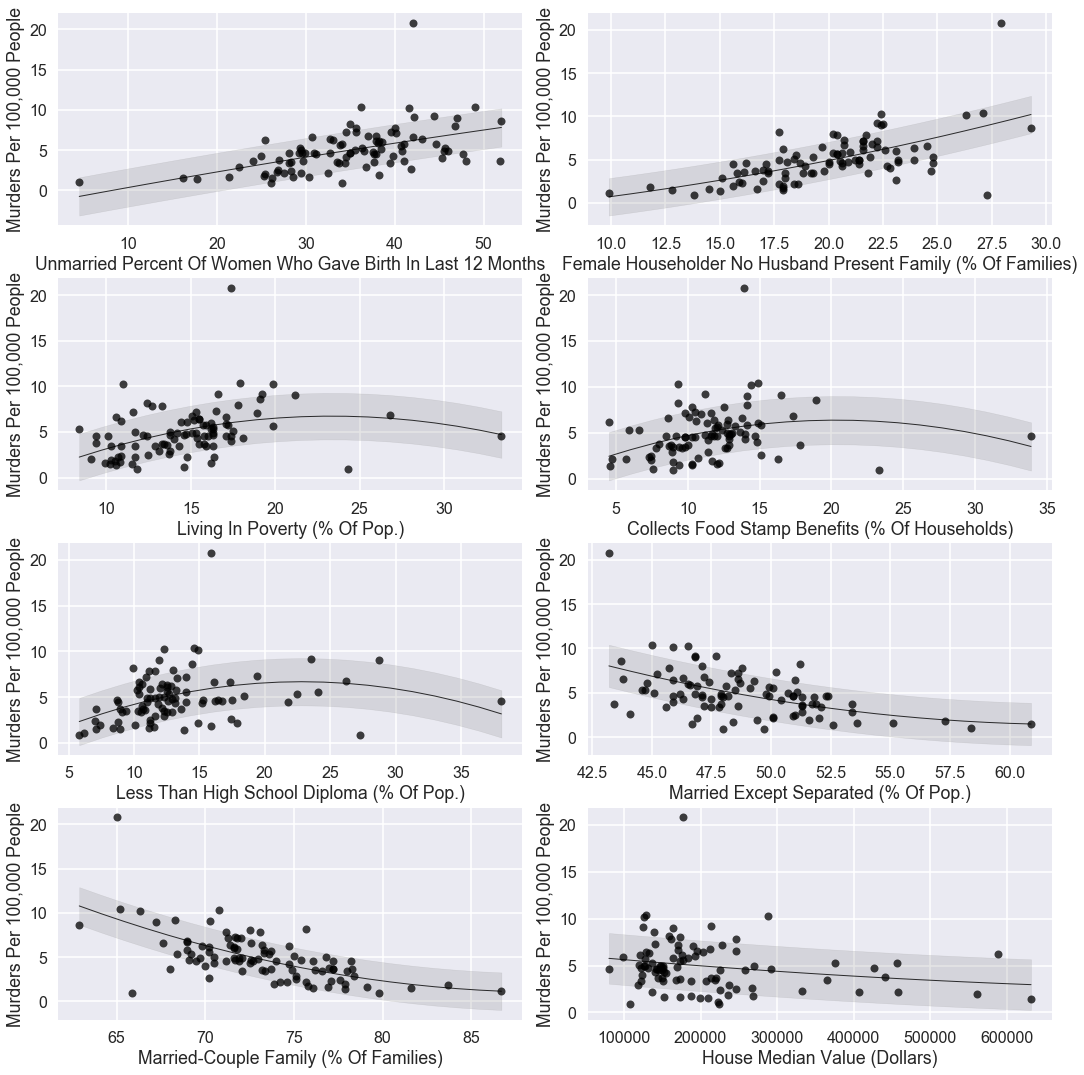

In [10]:
fig, ax = plt.subplots(4, 2, figsize=(15, 15))
plt.tight_layout()
x_vals = np.linspace(0, 1, 100)
x_vals = x_vals.reshape(len(x_vals),1)
ax = ax.ravel()
y = df_2010.murder_per_100_k
for i in range(0, len(selected_cols)-1):
    x = df_2010[selected_cols[i]]
    params = np.polyfit(x, y, 2)
    xp = np.linspace(x.min(), x.max(), 20)
    yp = np.polyval(params, xp)
    ax[i].plot(xp, yp, 'k', alpha=0.8, linewidth=1)
    ax[i].plot(x, y, 'o', markersize=8, alpha=0.75, color='black')
    sig = np.std(y - np.polyval(params, x))
    ax[i].fill_between(xp, yp - sig, yp + sig, color='gray', alpha=0.2)
    ax[i].set_xlabel(selected_col_x_vals[i])
    ax[i].set_ylabel(selected_col_x_vals[-1])

## EDA On All Data

In [11]:
df_all = pd.read_csv('../data/merged/all_data_2006_to_2016.csv')

In [12]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 13 columns):
MSA_orig                                                                       929 non-null object
MSA_corr                                                                       929 non-null object
MSA_abbr                                                                       929 non-null object
year                                                                           929 non-null int64
now_married_except_separated                                                   929 non-null float64
less_than_high_school_diploma                                                  929 non-null float64
unmarried_portion_of_women_15_to_50_years_who_had_a_birth_in_past_12_months    929 non-null float64
households_with_food_stamp_snap_benefits                                       929 non-null float64
percentage_married-couple_family                                               929 non-null float64


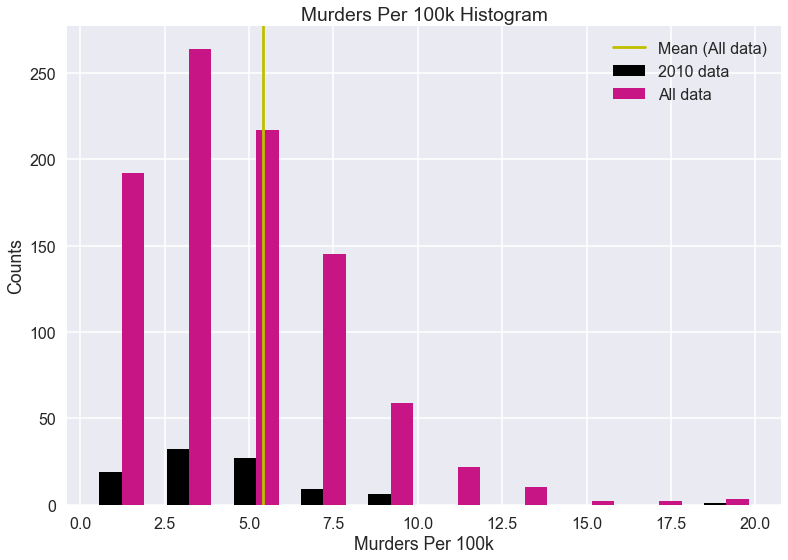

In [13]:
with sns.axes_style("darkgrid"):
    np.random.seed(0)
    fig, ax = plt.subplots()

    a_heights, a_bins = np.histogram(df_2010['murder_per_100_k'])
    b_heights, b_bins = np.histogram(df_all['murder_per_100_k'], bins=a_bins)

    width = (a_bins[1] - a_bins[0])/3

    ax.bar(a_bins[:-1], a_heights, width=width, facecolor='black',
           label='2010 data')
    ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='mediumvioletred',
           label='All data')
    plt.axvline(df_all.murder_per_100_k.mean(), 0, 1, color='y', label='Mean (All data)')
    plt.xlabel("Murders Per 100k")
    plt.ylabel("Counts")
    plt.title("Murders Per 100k Histogram")
    plt.legend()

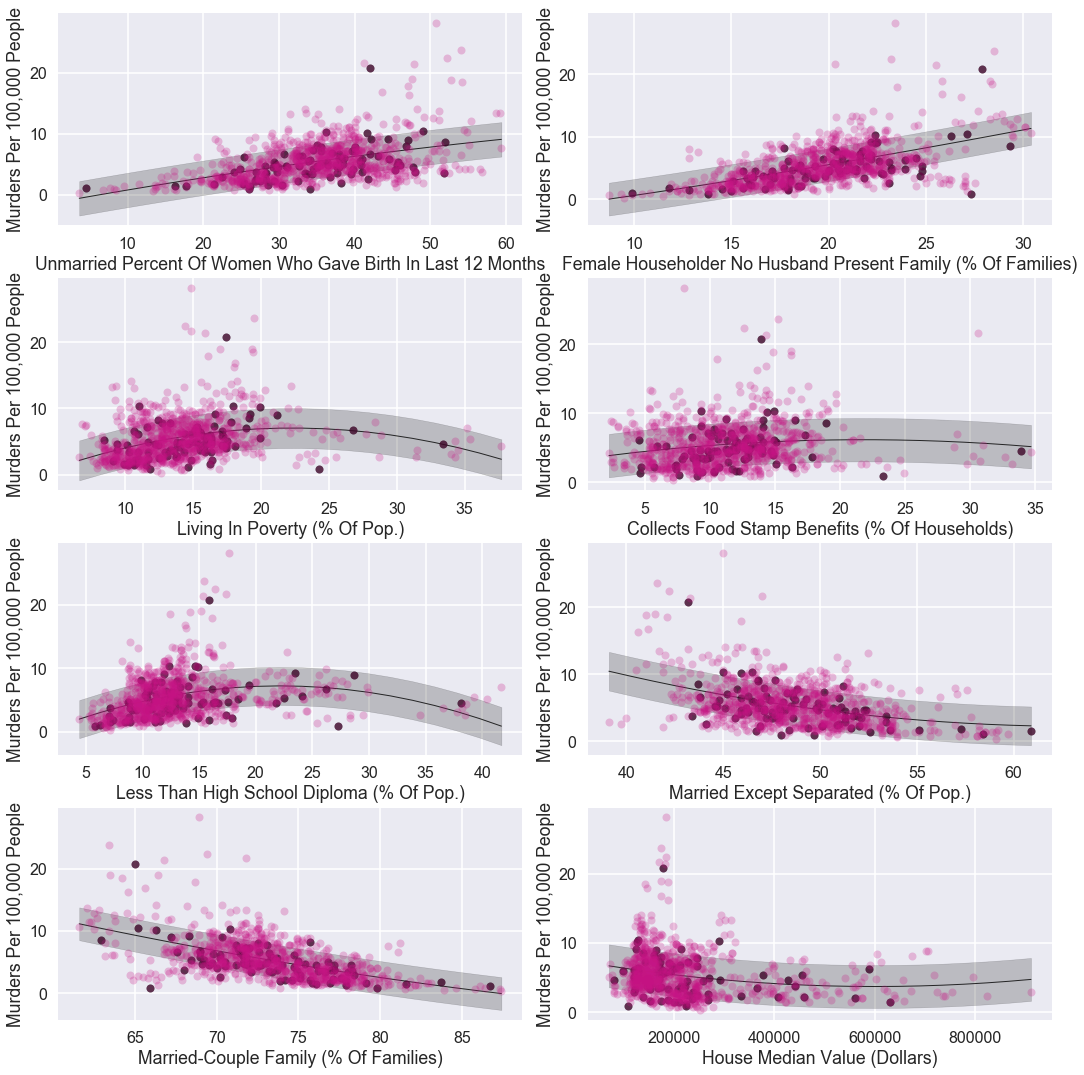

In [14]:
fig, ax = plt.subplots(4, 2, figsize=(15, 15))
plt.tight_layout()
x_vals = np.linspace(0, 1, 100)
x_vals = x_vals.reshape(len(x_vals),1)
ax = ax.ravel()
y_2010 = df_2010.murder_per_100_k
y_all = df_all.murder_per_100_k
for i in range(0, len(selected_cols)-1):
    x_2010 = df_2010[selected_cols[i]]
    x_all = df_all[selected_cols[i]]
    params = np.polyfit(x_all, y_all, 2)
    xp_all = np.linspace(x_all.min(), x_all.max(), 20)
    yp_all = np.polyval(params, xp_all)
    ax[i].plot(x_2010, y_2010, 'o', markersize=8, alpha=0.75, color='black')
    ax[i].plot(xp_all, yp_all, 'k', alpha=0.8, linewidth=1)
    ax[i].plot(x_all, y_all, 'o', markersize=8, alpha=0.25, color='mediumvioletred')
    sig = np.std(y_all - np.polyval(params, x_all))
    ax[i].fill_between(xp_all, yp_all - sig, yp_all + sig, color='k', alpha=0.2)
    ax[i].set_xlabel(selected_col_x_vals[i])
    ax[i].set_ylabel(selected_col_x_vals[-1])

In [15]:
def print_runtime():
    hours = int(str(end)[0:2])-int(str(start)[0:2])
    minutes = int(str(end)[3:5])-int(str(start)[3:5])
    seconds = int(str(end)[6:8])-int(str(start)[6:8])
    if hours < 0:
        hours = hours + 24
    if minutes < 0:
        minutes = minutes + 60
        hours = hours - 1
    if seconds < 0:
        seconds = seconds + 60
        minutes = minutes - 1
    print(hours, "hrs", minutes, "mins", seconds, "secs")

In [16]:
end = datetime.datetime.time(datetime.datetime.now())

In [17]:
print_runtime()

0 hrs 0 mins 5 secs
